In [1]:
import numpy as np
import pandas as pd
import os

from PIL import Image
import matplotlib.pyplot as plt
from glob import glob

In [2]:
# Read PGM image
def read_pgm(filename):
    with open(filename, 'rb') as f:
        f.readline()  # skip the magic number
        f.readline()  # skip the comment line
        width, height = map(int, f.readline().split())
        max_val = int(f.readline().strip())
        image = np.fromfile(f, dtype=np.uint8, count=width*height).reshape((height, width))
        return image

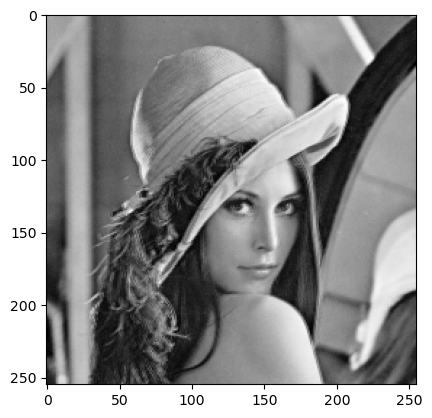

In [41]:
img = Image.open('lenaout/cpuOut_8_4_2_T.pgm')
plt.imshow(img, cmap='gray')

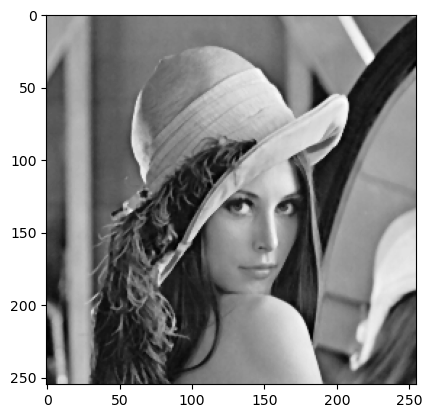

In [42]:
img = Image.open('lenaout/lenaout_4_4_2_T.pgm')
plt.imshow(img, cmap='gray')

In [13]:
execution_times = 'execution_times.csv'

cols = ["label", "block_size", "window_size", "stride_size", "mem_type", "time"]
df = pd.read_csv(execution_times, names=cols)
df = df[df['label'] == 'copy-compute-copy time']
df

,label,block_size,window_size,stride_size,mem_type,time
1,copy-compute-copy time,4,4,1,G,0.085517
4,copy-compute-copy time,4,4,1,T,0.072868
7,copy-compute-copy time,4,4,2,G,0.070833
10,copy-compute-copy time,4,4,2,S,0.073759
13,copy-compute-copy time,4,4,4,G,0.080072
...,...,...,...,...,...,...
258,copy-compute-copy time,32,8,1,G,0.087566
262,copy-compute-copy time,32,8,2,G,0.071154
266,copy-compute-copy time,32,8,2,T,0.076145
269,copy-compute-copy time,32,8,4,G,0.085826


In [14]:
# Step 1: Grouping data
means = df.groupby(['block_size', 'mem_type'])['time'].mean().unstack()
means = means.dropna()

# block_sizes = df['block_size'].unique()
# x = np.arange(len(block_sizes))

# width = 0.25  # the width of the bars
# multiplier = 0

# fig, ax = plt.subplots(layout='constrained')

# for i, (attribute, measurement) in enumerate(means.items()):
#     offset = width*multiplier
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext = (0, 3),
#                     textcoords='offset points',
#                     ha='center',va='bottom')
#     multiplier +=1

# fig.savefig('test')

In [15]:
means

mem_type,G,S,T
block_size,,,
4,0.072889,0.081252,0.073104
6,0.074800,0.082704,0.078414
8,0.079774,0.074820,0.073973
12,0.077782,0.073483,0.078770


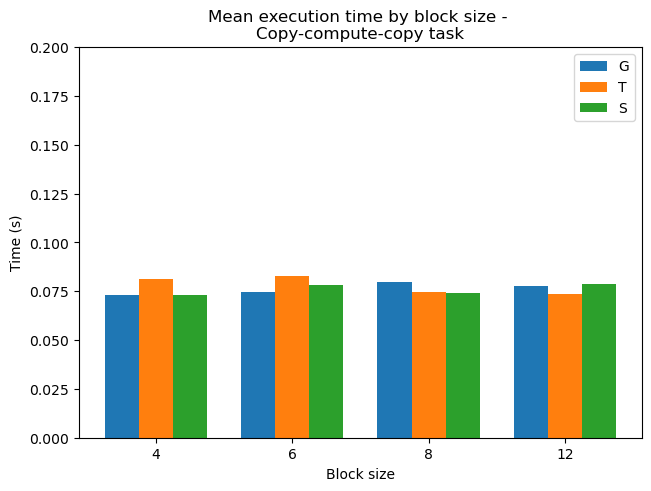

In [16]:
block_sizes = (4, 6, 8, 12)
means = {
    'G' : (0.072889, 0.074800, 0.079774, 0.077782),
    'T' : (0.081252, 0.082704, 0.074820, 0.073483),
    'S' : (0.073104, 0.078414, 0.073973, 0.078770),
}

x = np.arange(len(block_sizes))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in means.items():
    offset = width*multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (s)')
ax.set_xlabel('Block size')
ax.set_title('Mean execution time by block size - \nCopy-compute-copy task')
ax.set_xticks(x + width, block_sizes)
ax.legend(loc='upper right')
ax.set_ylim(0, 0.2)

plt.show()
fig.savefig("mean_ex_time.pdf")

In [17]:
df = pd.read_csv(execution_times, names=cols)
df = df[df['label'] == 'Load time']
df

,label,block_size,window_size,stride_size,mem_type,time
0,Load time,4,4,1,G,0.004454
3,Load time,4,4,1,T,0.004032
6,Load time,4,4,2,G,0.004353
9,Load time,4,4,2,S,0.003983
12,Load time,4,4,4,G,0.003867
...,...,...,...,...,...,...
264,Load time,32,8,2,S,0.004285
265,Load time,32,8,2,T,0.004074
268,Load time,32,8,4,G,0.003785
271,Load time,32,8,4,S,0.004085


In [18]:
means = df.groupby(['block_size', 'mem_type'])['time'].mean().unstack()
means = means.dropna()

In [19]:
means

mem_type,G,S,T
block_size,,,
4,0.003767,0.004172,0.003510
6,0.004101,0.004188,0.003902
8,0.003971,0.004075,0.004211
12,0.004211,0.004207,0.003971
16,0.004194,0.004154,0.004242
24,0.004060,0.004094,0.004102
32,0.004020,0.004172,0.004069


In [20]:
df = pd.read_csv(execution_times, names=cols)
df = df[df['label'] == 'copy-compute-copy time']
df

,label,block_size,window_size,stride_size,mem_type,time
1,copy-compute-copy time,4,4,1,G,0.085517
4,copy-compute-copy time,4,4,1,T,0.072868
7,copy-compute-copy time,4,4,2,G,0.070833
10,copy-compute-copy time,4,4,2,S,0.073759
13,copy-compute-copy time,4,4,4,G,0.080072
...,...,...,...,...,...,...
258,copy-compute-copy time,32,8,1,G,0.087566
262,copy-compute-copy time,32,8,2,G,0.071154
266,copy-compute-copy time,32,8,2,T,0.076145
269,copy-compute-copy time,32,8,4,G,0.085826


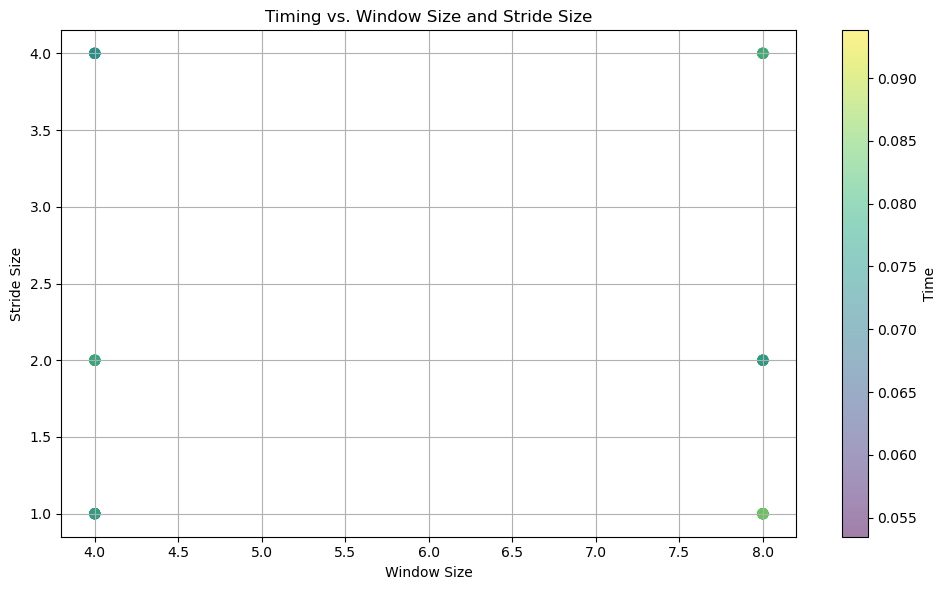

In [29]:
block_sizes = df['block_size']
window_sizes = df['window_size']
stride_sizes = df['stride_size']
timings = df['time']

fig = plt.figure(figsize=(10, 6))

# Create scatter plot
plt.scatter(window_sizes, stride_sizes, c=timings, cmap='viridis', s=50, alpha=0.5)

# Add colorbar
plt.colorbar(label='Time')

# Add labels and title
plt.xlabel('Window Size')
plt.ylabel('Stride Size')
plt.title('Timing vs. Window Size and Stride Size')

plt.grid(True)  # Optionally add grid

plt.tight_layout()
plt.show()
fig.savefig("timing_vs_window_stride.pdf")

In [22]:
def amdahls_law(P, N):
    return 1 / ((1-P) + (P/N))

cpu_times = df[df['label'] == 'cpu time']
gpu_times = df[df['label'] == 'copy-compute-copy time']

avg_times = cpu_times.groupby('block_size')['time'].mean()
avg_gpu_times = gpu_times.groupby('block_size')['time'].mean()

avg_times['num_threads'] = 512 / avg_times.index

P = 1 - (1 / avg_times['num_threads'])

speedups = 1 / ((1 - P) + (P / avg_times['num_threads']))

# for 
#     print(f"{block_size}\t\t{speedup}")

print(avg_times)
print(" ")
print(speedups)  # speedup is single processing time : gpu processing time

block_size
num_threads    Index([], dtype='float64', name='block_size')
Name: time, dtype: object
 
Index([], dtype='float64', name='block_size')


In [23]:
block_size = [4, 6, 8, 12]
avg_cpu_time = [0.112031, 0.107644, 0.110651, 0.095227]
speedups = [64.250, 42.918, 32.251, 21.586]
avg_gpu_times = [0.075340, 0.077623, 0.076580, 0.077835]
actual_speedup = [cpu_time / gpu_time for cpu_time, gpu_time in zip(avg_cpu_time, avg_gpu_times)]

In [24]:
avg_times

block_size
num_threads    Index([], dtype='float64', name='block_size')
Name: time, dtype: object

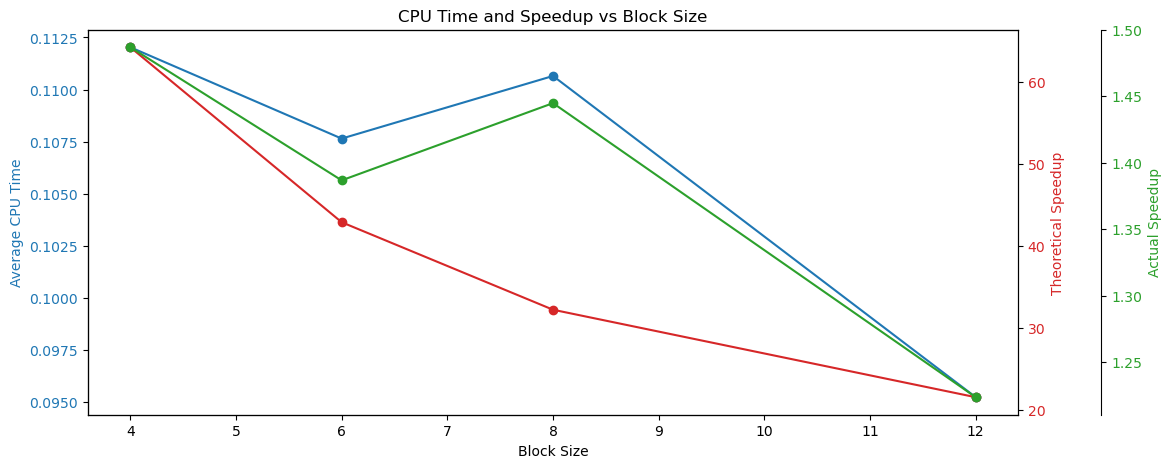

<Figure size 640x480 with 0 Axes>

In [27]:
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plotting CPU time vs block size
ax1.plot(block_size, avg_cpu_time, marker='o', linestyle='-', color='tab:blue')
ax1.set_xlabel('Block Size')
ax1.set_ylabel('Average CPU Time', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Creating a twin y-axis for speedup
ax2 = ax1.twinx()
ax2.plot(block_size, speedups, marker='o', linestyle='-', color='tab:red')
ax2.set_ylabel('Theoretical Speedup', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(block_size, actual_speedup, marker='o', linestyle='-', color='tab:green', label='Actual Speedup')
ax3.set_ylabel('Actual Speedup', color='tab:green')
ax3.tick_params(axis='y', labelcolor='tab:green')

plt.title('CPU Time and Speedup vs Block Size')
plt.show()
plt.tight_layout()

fig.savefig("ahmdahls.pdf")

In [3]:
import numpy as np

# Function to load and compare images pixel by pixel
def _compare_images(image1_path, image2_path, tolerance=1):
    image1 = Image.open(image1_path)
    image2 = Image.open(image2_path)

    # Ensure images have the same size
    if image1.size != image2.size:
        raise ValueError("Images must have the same dimensions for comparison.")

    width, height = image1.size
    diff_pixels = 0

    # Compare pixels
    for y in range(height):
        for x in range(width):
            pixel1 = image1.getpixel((x, y))
            pixel2 = image2.getpixel((x, y))
            #print(pixel1, pixel2)
            if not np.all(np.isclose(pixel1, pixel2, atol=tolerance)):
                diff_pixels += 1

    # Calculate percentage difference
    total_pixels = width * height
    percent_difference = (diff_pixels / total_pixels) * 100
    return percent_difference


In [5]:
# Search for images with similar parameters
image_dir = "lenaout"
image_files = glob(os.path.join(image_dir, "lenaout_*_*.pgm"))
G_diff = []
S_diff = []
T_diff = []
for lena_image_path in image_files:
    #print(lena_image_path)
    # Extract parameters from lena image filename
    _, block_size, window_size, stride_size, mem_type = os.path.basename(lena_image_path).split("_")
    #print(mem_type)
    cpu_image_path = os.path.join(image_dir, f"cpuOut_{block_size}_{window_size}_{stride_size}_{mem_type}")

    #print(cpu_image_path)
    # Check if corresponding CPU image exists
    if os.path.exists(cpu_image_path):
        # Compare images
        percent_diff = _compare_images(lena_image_path, cpu_image_path)
        #print(mem_type)
        if mem_type == "T.pgm":
            T_diff.append(percent_diff)
        if mem_type == "S.pgm":
            S_diff.append(percent_diff)
        if mem_type == "G.pgm":
            G_diff.append(percent_diff)
        #print(f"Comparison for parameters: block_size={block_size}, window_size={window_size}, stride_size={stride_size}, mem_type={mem_type}")
        #print(f"Percentage Difference: {percent_diff:.2f}%")
    else:
        print(f"No corresponding CPU image found for {lena_image_path}")

No corresponding CPU image found for lenaout/lenaout_16_4_2_T.pgm
No corresponding CPU image found for lenaout/lenaout_24_4_1_G.pgm
No corresponding CPU image found for lenaout/lenaout_16_4_4_T.pgm
No corresponding CPU image found for lenaout/lenaout_4_4_1_S.pgm
No corresponding CPU image found for lenaout/lenaout_8_4_2_S.pgm
No corresponding CPU image found for lenaout/lenaout_32_8_1_T.pgm
No corresponding CPU image found for lenaout/lenaout_4_4_2_T.pgm
No corresponding CPU image found for lenaout/lenaout_6_8_1_G.pgm
No corresponding CPU image found for lenaout/lenaout_4_4_4_T.pgm
No corresponding CPU image found for lenaout/lenaout_32_4_1_T.pgm
No corresponding CPU image found for lenaout/lenaout_6_4_1_S.pgm
No corresponding CPU image found for lenaout/lenaout_12_4_2_T.pgm
No corresponding CPU image found for lenaout/lenaout_24_8_2_G.pgm
No corresponding CPU image found for lenaout/lenaout_6_4_2_T.pgm
No corresponding CPU image found for lenaout/lenaout_6_4_2_S.pgm


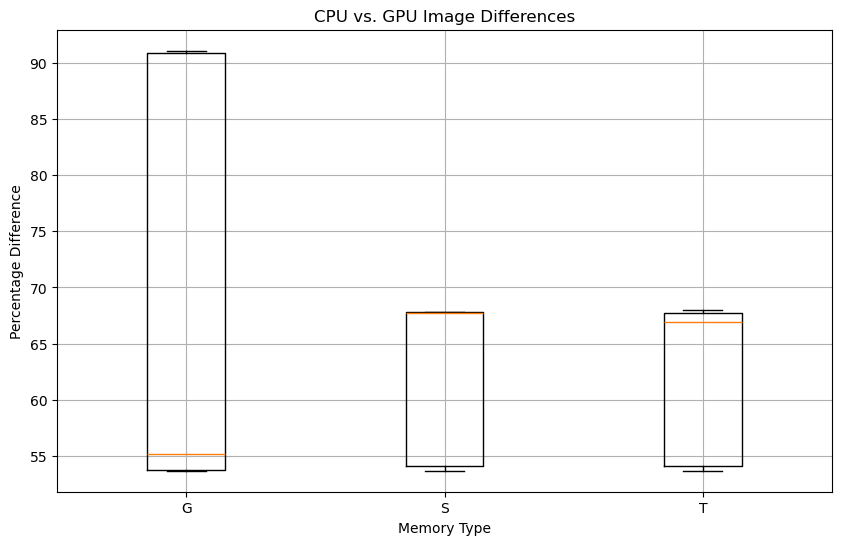

In [11]:
data = [G_diff, S_diff, T_diff]
labels = ['G', 'S', 'T']

# Create box plot
fig = plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels)
plt.title('CPU vs. GPU Image Differences')
plt.xlabel('Memory Type')
plt.ylabel('Percentage Difference')
plt.grid(True)
plt.show()

fig.savefig("comparisons.pdf")

<Figure size 640x480 with 0 Axes>